<a href="https://colab.research.google.com/github/vladarama/stock-price-prediction/blob/main/Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting the closing price of a stock based on the last number of prices
360-420-DW 

Winter 2022

Term Project 1


Vlad Arama (Section 02) and Shanvin Luo (Section 03)

April 19th, 2022

## Introduction

**Research question**: How accurately can machine learning predict the closing price of a stock(dependent variable), based on the last x prices (independent variable), by measuring the impact of reduced interval of training on the percent error of our output.

**Explanation:** Nowadays, stock trading using bots and python is a very hot topic, since many think that it might be a profitable way to trade and to minimize risk. However, trading isn't as simple as everyone makes it to be; creating a bot to accurately and reliably predict the fluctuation of market prices isn't something simple. If that were the case, everyone would already be rich through stock trading. One of the reasons why trading is so difficult is because there are multiple factors that influence the fluctuation of the stocks' values such as news, market movements, the state of our economy, the emotions of traders, etc. People have taken advantage of these factors to create techniques for the purpose of helping to make decisions in the stock market, such as using existing data to predict future movements. However, as mentionned previously, it is not easy to do so reliably and accurately. As such, we want to see how accurately machine learning can predict the closing price of a stock, based on the last x number of prices, by measuring the impact of reduced training time on the percent error of our output.

We will measure the accuracy of our model by calculating the percentage of error between the real price of the stock and our model's prediction. Furthermore we will train and test our model using a different range of numbers in order to see how many days of price history are required to predict the closing price of the next day. For example, we will start training the model with 10 days of data, then 20 days, 30 days ... and we will measure the consequences of a reduced or increased interval of training on the percent error of our output. In other words, with the results that we will obtain, we will decide if the interval of training has an effect on the accuracy of our model's predictions. 

## Theory of the model
In order to achieve our intended objective, we need a model that can observe and learn from the history of a sequence of data and that can predict the next element in that sequence of data, like the price of a stock. These types of models are called time series. In addition, we will need a precise time series model in order to accurately predict the closing price of our stock. There are many avenues we could take in order to build such a model, like using moving averages, exponential moving averages etc... Instead, we will use the LSTM model (Long Short Term Memory) as it is considered one of the most precise time series forecasting models. LSTM is a kind of recurrent neural network (RNN), which is part of the huge field of deep learning. The problem with other RNN models is that they have a short term memory, which means that they are not very accurate for long term predictions, since they tend to forget a lot of information quickly. This is the biggest advantage of the LSTM model since it chooses what information to keep in memory and what information to forget. This makes it a very good model in order to predict the price of a stock based on a certain quantity of prices, since the model can quickly determine which prices are useful for the prediction and which ones he should forget. This model has three subdivisions, the forget gate, the input gate and the output gate as seen below. 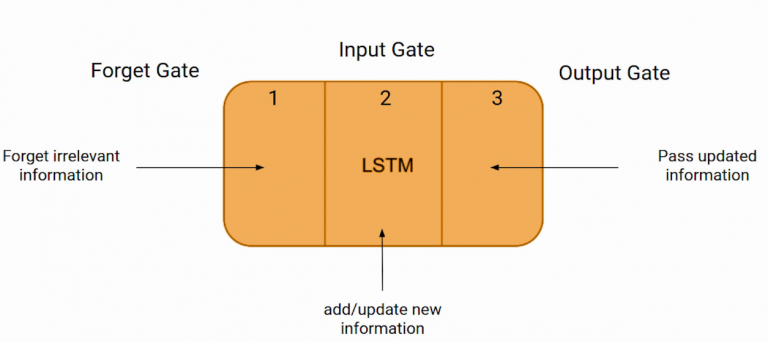

Source of image: https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/ 

One can go into a lot more detail about the LSTM, but this level of understanding is enough for the purpose of our project.

## Description of the numerical method

Our model will be trained using a sliding window of time in order to predict the next price. For example, we will train the model to look at the previous 10 prices in order to predict the 11th price. That way, the model will go through the whole data set and will learn about this precise pattern, by looking at different sequences of the 10 last prices to predict the next one. After training it, the model will be able to predict the next price of a stock after looking at the last 10 prices. This is just an example of how our model will work, but we will test out our model with different parameters in order to see how the percentage error changes based on the last x number of prices. 

It is also important to know that running this model on the same dataset with the same parameters will give different predictions and different values of error everytime since the LSTM model automatically assigns a random weight to each neuron it uses, which means that we will obtain a different accuracy everytime. It also means that someone else running this exact code might not obtain the same results as us.

We will measure the accuracy of our model by looking at the percent error between the expected prediction of our model and the actual closing price of the stock.

We will be explaining our numerical method and how our code is used to attain our objective at the beginning of each phase of code below.

## Setup for the code (PHASE 1)

Before starting to code anything, we have to import all of the libraries and the modules required. In order to acquire stock data, such as the closing price of a stock for each day, we will be using a library called yfinance, which looks at the stock history on yahoo finance, one of the most popular financial news network. 

Then, we will have to choose a certain stock to analyse and to train our model on. In our case, we decided to use the Facebook stock data (ticker FB) because it seemed to present a lot of variation, which can be very useful for training our model.


In [ ]:
# Necessary libraries to import

!pip install yfinance a
import yfinance as yf #Fetching historical market data from Yahoo Finance
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean #Used to find the mean of a list
import seaborn as sns #Python data visualization library based on matplotlib
from datetime import datetime #Classes for manipulating dates and times
from sklearn.preprocessing import MinMaxScaler, StandardScaler #To standardize a dataset along any axis
from keras.models import Sequential #Python library for developing and evaluating deep learning models
from keras.layers import Dense, LSTM #Library with the basic building blocks of neural networks

     |████████████████████████████████| 6.4 MB 5.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for a: filename=a-1.0-py3-none-any.whl size=1176 sha256=449b9719d05a1cc1684064b1587b60202eb2c48816c4355b82671ad3ea75f05d
  Stored in directory: /root/.cache/pip/wheels/05/19/25/974e5e512f002699d0251c8490a983d4f8c8c8e29b7f425a8e
Successfully built a
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1,

In [ ]:
# Importing the stock history using yfinance

# Here, from datetime, we choose the date interval in which we want to study the data in a yyyy,mm,dd format. 
startdate = datetime(2020,1,1)
enddate = datetime(2020,10,5)

stock = yf.Ticker('FB') #Using the Ticker module from yfinance, we stored 'FB' (Ticker for Facebook) in the variable 'stock'
datastock = stock.history(start = startdate, end = enddate) #Stores the 'history' of stock from startdate to enddate in datastock
print(f"Our stockdata contains {datastock.shape[0]} prices") #Prints the size of the array datastock at its 0th position in form of a string

#Checking if there is any missing data
def check_missing():
    datastock_info=datastock.info()
    missing = datastock.isnull().sum()
    return missing
check_missing()

#Dropping unused columns 
datastock_dropped=datastock.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'], axis=1) 


# To confirm that our data is valid, the dataset is imported
datastock_dropped.head()

Our stockdata contains 191 prices
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191 entries, 2020-01-02 to 2020-10-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          191 non-null    float64
 1   High          191 non-null    float64
 2   Low           191 non-null    float64
 3   Close         191 non-null    float64
 4   Volume        191 non-null    int64  
 5   Dividends     191 non-null    int64  
 6   Stock Splits  191 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 11.9 KB


,Close
Date,
2020-01-02,209.779999
2020-01-03,208.669998
2020-01-06,212.600006
2020-01-07,213.059998
2020-01-08,215.220001


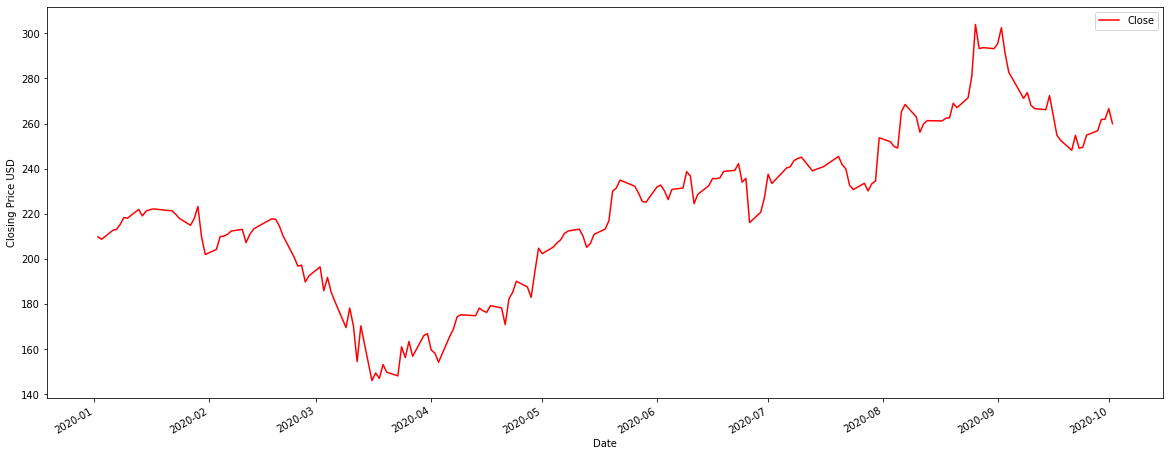

In [ ]:
# We used the column 'Date' as our index for our graph
datastock['Date']=datastock.index

# Plotting the closing price of our stock data based on the date in order to see our data in a more visual way
%matplotlib inline

datastock.plot(x='Date', y='Close', kind='line', xlabel = 'Date', ylabel = 'Closing Price USD' , figsize=(20,8), c="red", linestyle="solid")


## Preparing the data (PHASE 2)

Before training our model, we have to prepare our data and convert it into a form that the LSTM model is able to understand. First, we have to normalize our dataset by converting it to numbers in between 0 and 1 and create new lists that will contain the input data (X_sample) and the output data (y_sample) used by the model. Since this part of the code is an introduction to the model, we will start by training our model to predict the 11th price based on the last 10 prices. This value can be modified by changing "time_steps". Finally, we have to reshape the input data from a 2D array into a 3D array which is how it is used by the LSTM model.

In [ ]:
# We have to create a new dataframe with only 'Close' as a column and convert it to an array
data = datastock_dropped.values

# We have to normalize our data set before training our model, we will use the minmaxscaler from the sklearn module
scal = MinMaxScaler()

scaler = scal.fit(data) #computes minimum and maximum of our data and stores it in 'scaler'
normalized_data = scaler.transform(data)
X = normalized_data

print(normalized_data[-10:])
print ()

[[0.64686506]
 [0.68866371]
 [0.65237494]
 [0.6556048 ]
 [0.68910707]
 [0.70177331]
 [0.73324894]
 [0.73394549]
 [0.76390122]
 [0.72153262]]



In [ ]:
# Splitting the data into two different arrays, one for the input and one for the output
X_samples = []
y_samples = []

row_numbers = len(X)
time_steps = 10 # Time Steps represents the last number of closing prices used to predict the next day

# Creates the combinations of the sliding window of prices in order to train the model
for i in range(time_steps, row_numbers):
  x_sample = X[i-time_steps:i] #Stores the values from i-time_steps to i of X into x_sample. This means that the sliding window will constantly take the most recent time_steps.
  y_sample = X[i]
  X_samples.append(x_sample)
  y_samples.append(y_sample)

# We need to reshape the input as a 3D array, since this is what the LSTM model uses to train itself
X_data = np.array(X_samples)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1) #Using the reshape function, the array X_samples is reshaped in 3D with the 0th and 1st position of X_samples as well as '1'
print(f"{X_data.shape} is the shape of the input data")

# Since y represents the output in our model, we do not need to reshape it as it is a single value (the closing price of our stock)
y_data = np.array(y_samples)
y_data = y_data.reshape(y_data.shape[0], 1)
print(f"{y_data.shape} is the shape of the output data")

(181, 10, 1) is the shape of the input data
(181, 1) is the shape of the output data


##Splitting the data into training and testing sets (PHASE 3)

The last step of preparing our data is to split our data into training and testing sets. Training sets are used by the model to learn about the behaviour of the data in order to predict. They are used precisely to "train" the model and they contain the real data. On the other hand, testing sets, which contain predicted values of the model, are often compared to the real data in order to observe how well the model was trained, by looking at different metrics such as RMSE, Percent Error and others. More specifically, our training sets will contain the whole data set, but will exclude the values in the testing set. For example, our training set might include the first 176 values out of 181, but we will use the last 5 values to test our predictions, which means the testing set contains the values from the 176th value to the 181st.

TestingSize can be used to modify the size of the testing set. We will keep this value constant at 5 when we will test different modifications, since we want to measure the impact of changing the time_steps.



In [ ]:
# Choosing the size of the testing set
TestingSize= 5

# Splitting the data into train and test sets that are used to train the model
X_train=X_data[:-TestingSize]
X_test=X_data[-TestingSize:]
y_train=y_data[:-TestingSize]
y_test=y_data[-TestingSize:]


## Training our model (PHASE 4)

The code below is used to train our LSTM model based on the inputs and the outputs we previously coded. The model is based on Recurrent Neural Networks and is trained usuing a series of neurons. It is optimized using the "adam" optimizer and the loss is calculated using the "mean_squared_error". The training of the model is a complicated process that is beyond the scope of our project, because changing a few variables, such as the quantity of neurons used, the batch_size or even the epochs can lead to a completely different model and prediction, which is why we will keep this training process constant and will only modify the number of prices the model is trained on (using time_steps).


Here is an article that explains the training process of our LSTM model and contains the values used for the training of a stock predicting LSTM model.

Hashmi, Farukh. “Predicting Stock Prices Using Deep Learning LSTM Model in Python.” Thinking Neuron, 25 Mar. 2021, https://thinkingneuron.com/predicting-stock-prices-using-deep-learning-lstm-model-in-python/. 


In [ ]:
# Input values for the LSTM model
TimeSteps = X_train.shape[1]
TotalFeatures = X_train.shape[2]

# Initialising the Reccurent Neural Network
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer (see source above for more explanations)
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer (represents the predicted stock price)
regressor.add(Dense(units = 1))

# Compiling the RNN, using the adam optimizer while trying to minimize the mean squared error
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Training the RNN using the test set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)







Epoch 1/100
36/36 [==============================] - 4s 11ms/step - loss: 0.2477
Epoch 2/100
36/36 [==============================] - 0s 12ms/step - loss: 0.1671
Epoch 3/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0360
Epoch 4/100
36/36 [==============================] - 0s 14ms/step - loss: 0.0156
Epoch 5/100
36/36 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 6/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0106
Epoch 7/100
36/36 [==============================] - 0s 13ms/step - loss: 0.0096
Epoch 8/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0091
Epoch 9/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 10/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0083
Epoch 11/100
36/36 [==============================] - 0s 13ms/step - loss: 0.0081
Epoch 12/100
36/36 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 13/100
36/36 [=====

## Making the predictions (PHASE 5)

Now that our model is trained and has learned from observing all of these data points, we can get to our predictions. We will proceed by using our model to predict the test data and to compare it to the real data, by producing an average percent error. First, we predict the values in the test set, but since we normalized all of the values, we will not get an exact stock price. Instead we will get a value between 0 and 1, which is why we need to reverse the scaling process to get normal stock prices.

We will measure the accuracy of the predictions of the model using the average percent error between the stock prices in the predicted test data and between the real stock prices.

We can visualize these predictions only on the test set (graph 1 below) or on the whole data set (graph 2).

Percent Error: 1.6652841948391703


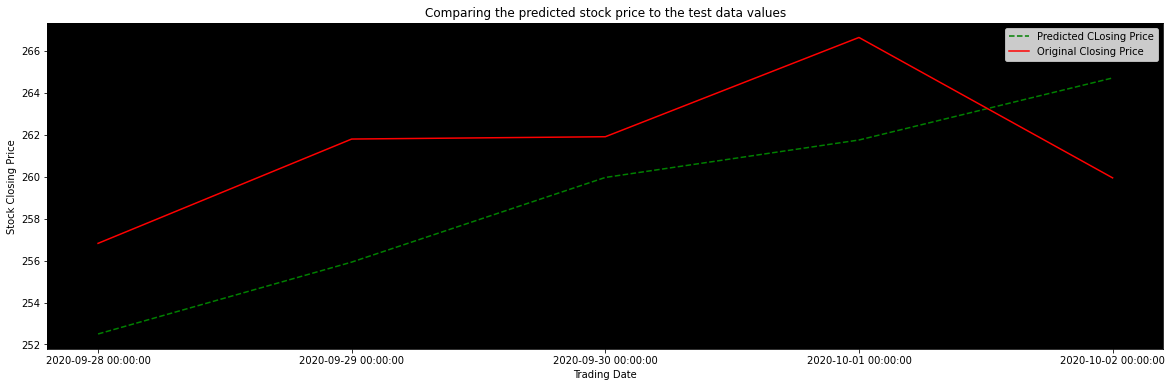

In [ ]:
# Making predictions on our test data using our model
predicted_Price = regressor.predict(X_test)
predicted_Price = scaler.inverse_transform(predicted_Price) # We have to reverse the scaling process in order to obtain the closing prices in dollars

# Acquiring the original price values for the testing data
original=y_test
original=scaler.inverse_transform(y_test)

# Calculating the accuracy of the predictions using Percent Error
print('Percent Error:', (100*(abs(original-predicted_Price)/original)).mean())

# Plotting the results of the predicting on our test data with the Stock closing prices as the y axis and the date as the x axis.
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = fig.add_subplot(111)
ax.patch.set_facecolor('black')
plt.plot(predicted_Price, color = 'green', label = 'Predicted CLosing Price', linestyle='dashed')
plt.plot(original, color = 'red', label = 'Original Closing Price')

plt.title('Comparing the predicted stock price to the test data values')
plt.xlabel('Trading Date')
plt.xticks(range(TestingSize), datastock.tail(TestingSize)['Date'])
plt.ylabel('Stock Closing Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

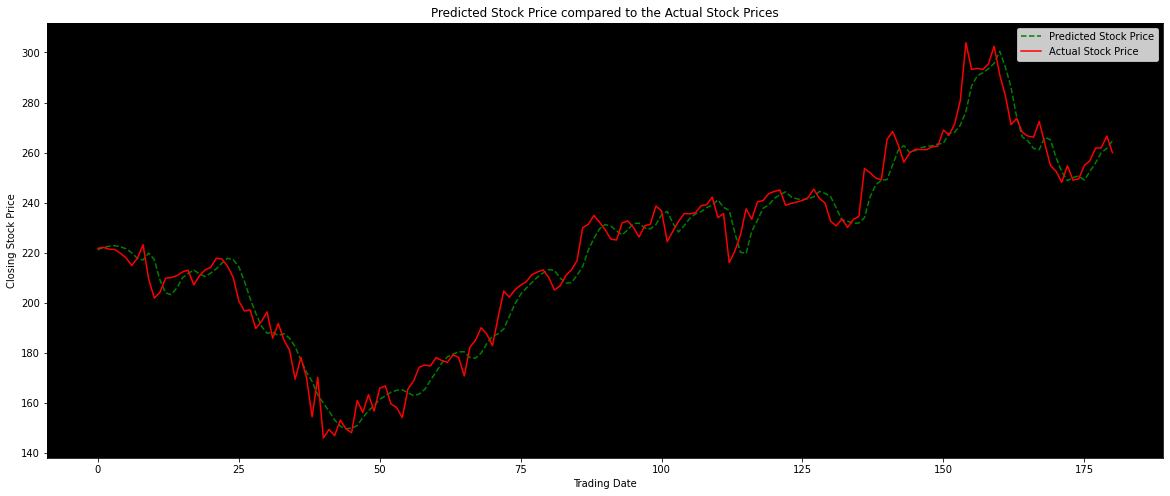

In [ ]:
# Generating predictions on our imported full data
TrainPredictions=scaler.inverse_transform(regressor.predict(X_train)) # We have to reverse the scaling process in order to obtain the closing prices in dollars
TestPredictions=scaler.inverse_transform(regressor.predict(X_test)) 

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=data[TimeSteps:]

# Plotting the full data to compare our model's predictions to the actual data
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = fig.add_subplot(111)
ax.patch.set_facecolor('black')
plt.plot(FullDataPredictions, color = 'green', label = 'Predicted Stock Price',linestyle='dashed')
plt.plot(FullDataOrig , color = 'red', label = 'Actual Stock Price',)


plt.title('Predicted Stock Price compared to the Actual Stock Prices')
plt.xlabel('Trading Date')
plt.ylabel('Closing Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

## Using a loop to solve our stated scientific question (PHASE 6)

In this final phase of our experiment, we will create a loop that will calculate the average percent error between our test values and the expected values, for different time steps (between 10 and 100, using steps of 10). Time steps are the last number of prices that the model uses in order to predict the next price. For a time step of 100, the model will look at the last 100 prices to predict the next price, while for a time step of 20, the model will look at the last 20 prices to predict the next one.

This means that we will train 20 different models that will produce 20 different percent errors and we will analyse the link between time_steps and the accuracy of our model by measuring the percent error difference.
Unfortunately we can only train a limited number of models (20 in our case), because training a model is a resource heavy task that takes a lot of computing power and time. Just to train 10 different models took about 20 minutes.

We are looping the last step of Phase 2 upto and including Phase 5, by changing the values of the time step. In order to capture the data of this loop, we created two arrays, an error array, which will capture the value of the percent error difference calculated at each time step and a time step array (j_array), which captures the different values of time steps used to train model and to predict. We will save the values of these arrays, since we do not to rerun the loop everytime in order to get the necessary values. As such, we will only run the loop once, we will save the values and we will discuss the results.

In [ ]:
# Main loop to test the accuracy of changing the time steps values using percent error

error_array = []
j_array = []
for j in range(10, 110, 5):
  # Splitting the data into two different arrays, one for the input and one for the output
  X_samples = []
  y_samples = []

  number_of_rows = len(X)
  time_steps = j # Time Steps represents the last number of closing prices used to predict the next day

  # Creates the combinations of the sliding window of prices in order to train the model
  for i in range(time_steps, number_of_rows, 1):
    x_sample = X[i-time_steps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

  # We need to reshape the input as a 3D array, since this is what the LSTM model uses
  X_data = np.array(X_samples)
  X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)


  # Since y represents the output in our model, we do not need to reshape it as it is a single value
  y_data = np.array(y_samples)
  y_data = y_data.reshape(y_data.shape[0], 1)



  # Choosing the size of our testing data set
  TestingSize= 5

  # Splitting the data into train and test sets that are used to train the model
  X_train=X_data[:-TestingSize]
  X_test=X_data[-TestingSize:]
  y_train=y_data[:-TestingSize]
  y_test=y_data[-TestingSize:]




  # Input values for the LSTM model
  TimeSteps = X_train.shape[1]
  TotalFeatures = X_train.shape[2]

  # Initialising the Reccurent Neural Network
  regressor = Sequential()

  # Adding the First input hidden layer and the LSTM layer
  regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

  # Adding the Second Second hidden layer and the LSTM layer
  regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

  # Adding the Second Third hidden layer and the LSTM layer
  regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))

  # Adding the output layer
  regressor.add(Dense(units = 1))

  # Compiling the RNN, using the adam optimizer while trying to minimize the mean squared error
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Training the RNN using the test set
  regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)



  # Making predictions on our test data using our model
  predicted_Price = regressor.predict(X_test)
  predicted_Price = scaler.inverse_transform(predicted_Price) # We have to reverse the scaling process in order to obtain the closing prices in dollars

  # Acquiring the original price values for the testing data
  original=y_test
  original=scaler.inverse_transform(y_test)

  # Calculating the accuracy of the predictions using Percent Error
  percent_error = (100*(abs(original-predicted_Price)/original)).mean()
  error_array.append(percent_error)
  j_array.append(j)








## Taking the results and presenting them to make a conclusion(Phase 7)

Now that we have our results, we will simply calculate the percent error of our results to determine their accuracy. We will also present our results in the form of a graph to make offer a better visual representation. With the outcome of this part, we will be able to come to draw our conlcusions as well as answer our research question. 

Our average percent error is 5.278938566859258 %


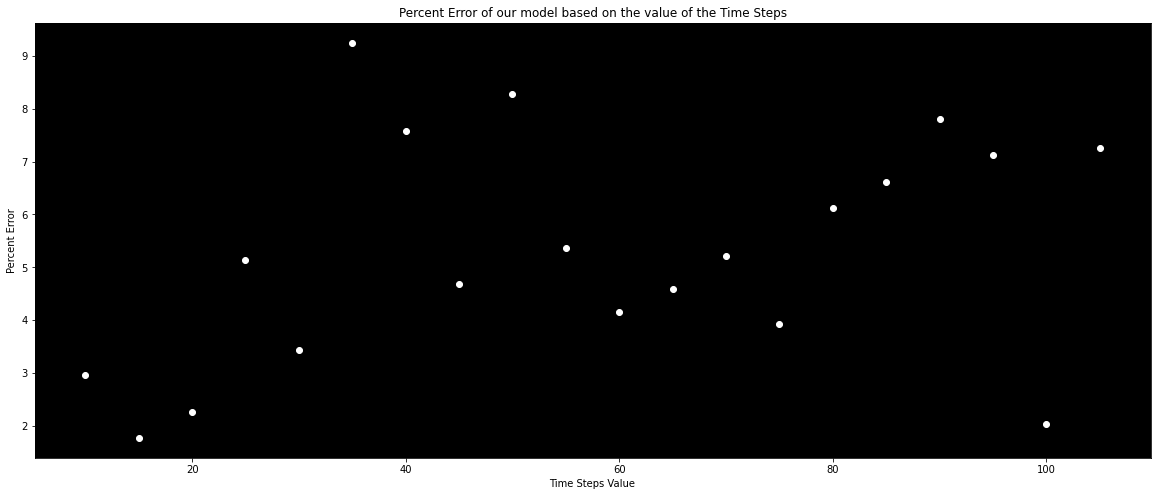

In [ ]:
# As explained above, we will use the data from one of our runs, since training the model within the loop can take a lot of time

# This data is what we have obtained in one of our previous runs of the loop. 

percent_error = [2.9522206556136603, 1.7664173892311745, 2.2629234604294077, 5.141322750603688, 3.430577963379992, 9.252287286503824, 7.58611075537642, 4.6767629834356839, 8.28861340030878, 5.366329350225061, 4.159949326090672, 4.5861016132031014, 5.2192885028051803, 3.9299110809578195, 6.112695476684577, 6.616597162220641, 7.813043121048574, 7.1281207280189545, 2.0306749668750763, 7.258823364172878]
j_array = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

#Calculating the average percent error 
def Average(percent_error):
    return mean(percent_error)
average1=Average(percent_error)
print ("Our average percent error is", average1,"%")

#Plotting our results
fig = plt.figure()
fig.patch.set_facecolor('white')

ax = fig.add_subplot(111)
ax.patch.set_facecolor('black')
plt.scatter(x=j_array, y=percent_error, c='white')
plt.title('Percent Error of our model based on the value of the Time Steps')
plt.xlabel('Time Steps Value')
plt.ylabel('Percent Error')
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()


Our average percent error without outliers is 4.901317808007566 %


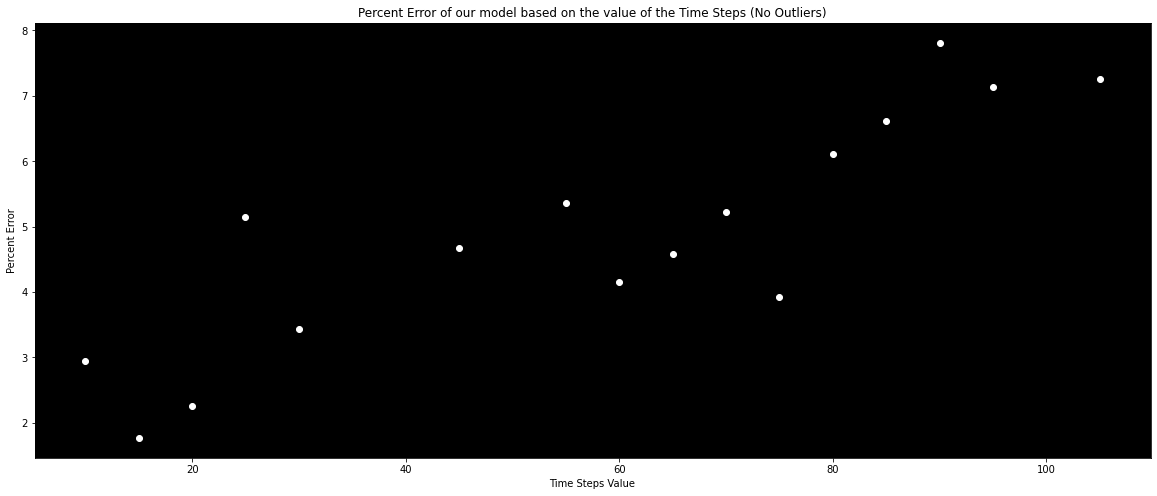

In [ ]:
# If we remove the main outliers from the dataset we obtain the graph below

percent_error = [2.9522206556136603, 1.7664173892311745, 2.2629234604294077, 5.141322750603688, 3.430577963379992, 4.6767629834356839, 5.366329350225061, 4.159949326090672, 4.5861016132031014, 5.2192885028051803, 3.9299110809578195, 6.112695476684577, 6.616597162220641, 7.813043121048574, 7.1281207280189545, 7.258823364172878]
j_array = [10, 15, 20, 25, 30, 45, 55, 60, 65, 70, 75, 80, 85, 90, 95, 105]
fig = plt.figure()
fig.patch.set_facecolor('white')

#Finding the average percent error 
def Average(percent_error):
    return mean(percent_error)
average2=Average(percent_error)
print ("Our average percent error without outliers is", average2, "%")

#Plotting our results
ax = fig.add_subplot(111)
ax.patch.set_facecolor('black')

plt.scatter(x=j_array, y=percent_error, c='white')
plt.title('Percent Error of our model based on the value of the Time Steps (No Outliers)')
plt.xlabel('Time Steps Value')
plt.ylabel('Percent Error')
fig.set_figwidth(20)
fig.set_figheight(8)

plt.show()




## Discussion

We can quickly notice that our model tends to produce outliers that do not match the general trend of the graph, which is that percent error increases as the time steps value increases. Which means that our model becomes less accurate if we train it using a higher number of prices. This might seem counter intuitive but if we think about it, it is very logical. According to our calculations, a model that is trained on the last 10 prices in order to calculate the 11th price is more accurate than a model trained on the last 100 prices to calculate the 101st price. This unexpected correlation makes sense because the last 10 prices of a stock are more indicative to what will happen in the short term rather than looking at the last 100 prices. Since our predicting window is so small (we only want to predict a single day), it is logical that training our model for the short term will produce better short term results than training it for the long term.

Furthermore, there is another reason to these interesting results. It is evident that training our model to look at the last 100 prices takes longer and requires more computing power than simply looking at the last 10 prices. This means that if we keep training time constant, the model that will be trained on the last 10 prices will be able to observe a higher quantity of data and will learn more from the patterns. On the other hand, due to the heavy computing power required for the model using the last 100 prices, the model will look at fewer sliding windows of time compared to the faster model.

Additionally, by taking off the outliers, our percent error goes from 5.28% to 4.90%. This answers our research question of how accurately can machine learning predict the closing price of a stock based on the last x prices to a certain extent. These values prove that in the model where we used the Facebook stock to determine the accuracy of our stock predictor, we were successful as the percent error was low even with the presence of outliers. The values that we obtained through this model shows that it is indeed possible to use machine learning to predict the closing price of a stock with the help of past data to a certain extent. However, our model only demonstrates this with the Facebook stock and doesn't account for other factors. In fact, other stocks might bring us completely different results and by re-running this code on the same stock at a different date might even bring us different results as well. Factors like volatility, news coverage and inflation are amongst many that prevent us from getting the grasp on accurately predicting the stock market. This shows the unreliability of our model, but also demonstrates the impossibility to precisely and completely determine the accuracy as to which machine learning can be used to predict stock values. This is because some bot predictor might be able to predict the patterns of some stocks, but will not be able to account for sudden changes and vice versa. To sum it all up, although our model is precise, it does not mean that others will be and the only conclusion we can come up with is that these bots are unreliable. 

Initially, we believed that we could have created a loop to take in data from more stocks than only one, so as to further improve the accuracy and reliability of our model. However, after coding the loop to solve our research question (Phase 6), we realized that it was unrealistic for the sole reason that it would take too much time to compile. In fact, it takes around 50 minutes finish running that part of the code, which lead us to believe that taking in even more data wasn't a realistic route to further our project. Currently, we lack the knowledge to further our code as to shorten the processing loop of phase 6. However, in the near future, it would be interesting to see how we can improve our code to be more efficient and even more reliable. 

We could take this term project even further by training our model to predict many days in the future instead of a single day and analysing the accuracy by calculating the percent error difference. This would be an interesting complementary project to do as it would show the performance of our model in long term predicting rather than a simple day prediction. 

In conclusion, our dependent variable (the predicted closing stock price) is greatly affected by the number of days that we use to predict the value of the closing price of our stock price (Independent variable). We can see that through our graphs that presented the percent Error of our model based on the value of the Time Steps. The unexpected correlation between percent error and time steps value shown in these graphs is due to the moving window on which we train our model. Through these conclusions, we can now successfully answer our research question: Machine learning is accurate in predicting closing stock prices with past data, but only when certain conditions are met. 

## References

Phi, Michael. “Illustrated Guide to LSTM's and GRU's: A Step by Step Explanation.” Medium, Towards Data Science, 28 June 2020, https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21. 

Hashmi, Farukh. “Predicting Stock Prices Using Deep Learning LSTM Model in Python.” Thinking Neuron, 25 Mar. 2021, https://thinkingneuron.com/predicting-stock-prices-using-deep-learning-lstm-model-in-python/. 

